# Project Numerical Analysis: 'Beams and Frameworks of Beams'

### Dependencies

In [1]:
from meshes import *
from get_S import get_extended_q_vector, get_extended_S

from scipy.sparse.linalg import spsolve
import matplotlib.pyplot as plt
import numpy as np

### Generate Mesh

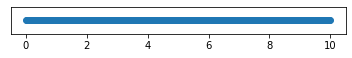

In [2]:
# Spatial resolution of mesh
N = 200

# Right limit of mesh
L = 10

# Generate 1D mesh
[nodes, elems, faces] = get_mesh_1D(N, [0,L], True);
elems = np.array(elems)[:-1,:]          # I believe there is one row too much in elems from get_mesh function

In [3]:
# Define some parameters, E, I, and q can also be lambda functions 
E = 1
I = 1
q = lambda x: x-4

# boundary conditions
QL = 0
M0 = 0
ML = 0
a  = 0
b  = 0
a0 = 0
aL = 0

# choose whether the beam is supported at both ends or only at the left end
two_sided_support = True


if two_sided_support:
    boundary_conditions = {'M0': M0, 'ML': ML, 'a0': a0, 'aL': aL}
else:
    boundary_conditions = {'QL': QL, 'ML': ML, 'a': a, 'b': b}

In [4]:
S_ext = get_extended_S(nodes, elems, E, I, two_sided_support)
rhs = get_extended_q_vector(nodes, elems, q, boundary_conditions, two_sided_support)    

C:\Users\sergi\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [5]:
solution = spsolve(S_ext, rhs)
w = solution[:-2]
Q0 = solution[-2]
QL = solution[-1]

In [6]:
with np.printoptions(precision=3, suppress=True):
    print(S_ext.toarray())

[[ 94567.188  47283.594 -94567.188 ...      0.         1.         0.   ]
 [ 47283.594  31522.396 -47283.594 ...      0.         0.         0.   ]
 [-94567.188 -47283.594 189134.376 ...      0.         0.         0.   ]
 ...
 [     0.         0.         0.    ...  31522.396      0.         0.   ]
 [     1.         0.         0.    ...      0.         0.         0.   ]
 [     0.         0.         0.    ...      0.         0.         0.   ]]


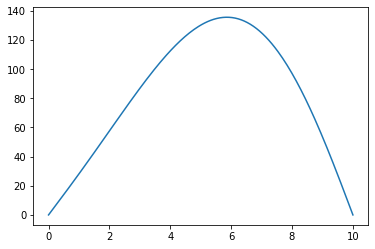

In [7]:
#plot solution from odd w values
plt.plot(nodes,w[::2])

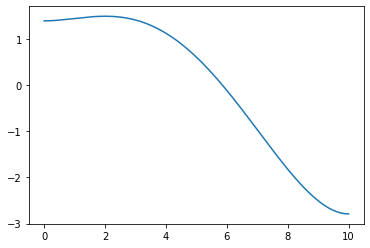

In [8]:
#plot derivative from even w values
plt.plot(nodes,w[1::2])

In [12]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

import matplotlib.pyplot as plt

import numpy as np
from AnalyticalSolutions import Cantilever

xx = np.linspace(0,5,100)


def f(a, b, QL, ML, x0, Load):
    
    ex = Cantilever(a,b,QL,ML,x0,Load)
    sol =  ex.get_solution(xx)
    plt.plot(xx, sol)

interact(f, a=(-20.0,20.0), b=(-5.0,5.0), QL=(-2.0,2.0), ML=(-2.0,2.0), x0=(0.0, 5.0), Load=["delta", "constant"])
plt.show()

interactive(children=(FloatSlider(value=0.0, description='a', max=20.0, min=-20.0), FloatSlider(value=0.0, des…

In [11]:
from AnalyticalSolutions import BothEnds

xx = np.linspace(0,5,100)


def f(A1, B1, A2, B2, x0, Load):
    
    ex = BothEnds(a,b,QL,ML,x0,Load)
    sol =  ex.get_solution(xx)
    plt.plot(xx, sol)

interact(f, A1=(-20.0,20.0), B1=(-20.0,20.0), A2=(-20.0,20.0), B2=(-20.0,20.0), x0=(0.0, 5.0), Load=["delta", "constant"])
plt.show()

interactive(children=(FloatSlider(value=0.0, description='A1', max=20.0, min=-20.0), FloatSlider(value=0.0, de…